In [7]:
import sys
print(sys.executable)


c:\Users\jacob\AppData\Local\Programs\Python\Python313\python.exe


In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
import plotly.express as px 
import folium 


In [10]:
path = "/Users/jacob/OneDrive/Programming/GitHub/BDAA Project SP25/EEG Data Visualization/data/EEG_data.csv"

In [13]:
dataset = pd.read_csv(path)
display(dataset)

,video_id,subject_id,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,...,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma,subject_understood
0,0,0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,...,1.583895,0.504567,0.471979,0.138717,1.801014,1.504794,0.258570,0.435745,0.469483,0
1,0,0,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,...,1.709560,0.606587,0.527616,0.155580,1.859177,1.379617,0.317579,0.468416,0.642560,0
2,0,0,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,...,1.873591,0.795834,0.565414,0.170816,2.027946,1.283876,0.441925,0.494701,0.798197,0
3,0,0,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,...,2.110017,1.021118,0.579656,0.180056,2.265952,1.306188,0.616881,0.506062,0.886495,0
4,0,0,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,...,2.462552,1.230984,0.573620,0.181081,2.461205,1.522420,0.822598,0.498361,0.874455,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68826,10,7,4353.846191,4349.487305,4317.563965,4343.461426,4375.641113,4296.025879,4351.666504,4309.358887,...,2.088463,0.925704,0.825126,0.576437,2.009375,3.020382,2.115835,1.735570,1.125858,1
68827,10,7,4335.769043,4326.538574,4310.641113,4331.153809,4363.333496,4297.179688,4336.025879,4282.563965,...,1.899325,0.833753,0.786224,0.600227,2.505607,2.680849,1.971062,1.468342,1.250918,1
68828,10,7,4321.666504,4313.205078,4310.000000,4310.384766,4357.436035,4296.025879,4337.563965,4291.153809,...,1.743110,0.789346,0.777936,0.631701,3.082165,2.443027,1.868980,1.213362,1.373250,1
68829,10,7,4334.615234,4316.666504,4318.717773,4339.102539,4370.512695,4297.436035,4333.461426,4297.051270,...,1.603054,0.781398,0.792152,0.661582,3.607407,2.341642,1.780673,0.982586,1.449505,1


In [ ]:
# Load the dataset
dataset = pd.read_csv("/Users/jacob/OneDrive/Programming/GitHub/BDAA Project SP25/EEG Data Visualization/data/EEG_data.csv")

# (Optional) Clean column names
dataset.columns = dataset.columns.str.strip().str.lower()

# Set subject and video
subject_id = 2
video_id = 4

# Filter
filtered = dataset[(dataset["subject_id"] == subject_id) & (dataset["video_id"] == video_id)]

# Confirm content
print(filtered[["subject_id", "video_id", "subject_understood"]].head())  # Show the column of interest

# Continue if data is present
if not filtered.empty:
    value_counts = filtered["subject_understood"].value_counts()

    # Safety check in case only one label exists
    label_map = {0: "Not Understood (0)", 1: "Understood (1)"}
    color_map = {0: "lightcoral", 1: "lightsteelblue"}

    labels = [label_map[val] for val in value_counts.index]
    colors = [color_map[val] for val in value_counts.index]

    percent_comparison = value_counts / value_counts.sum() * 100

    # Plot
    plt.figure(figsize=(9, 9))
    plt.pie(
        percent_comparison,
        labels=labels,
        autopct="%1.1f%%",
        colors=colors
    )
    plt.title(f"Understanding Breakdown for Subject {subject_id}, Video {video_id}")
    plt.show()
else:
    print("No matching data found.")

      subject_id  video_id  subject_understood
4804           1         2                   0
4805           1         2                   0
4806           1         2                   0
4807           1         2                   0
4808           1         2                   0
Value counts: subject_understood
0    2389
Name: count, dtype: int64


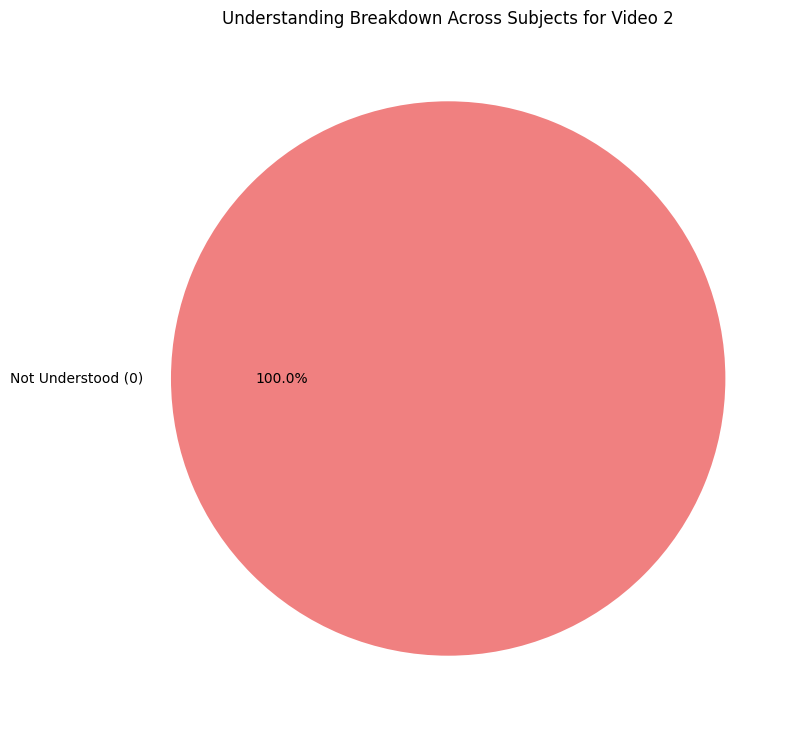

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("/Users/jacob/OneDrive/Programming/GitHub/BDAA Project SP25/EEG Data Visualization/data/EEG_data.csv")

# (Optional) Clean column names
dataset.columns = dataset.columns.str.strip().str.lower()

# Choose a single video ID to analyze across all subjects
video_id = 2

# Filter for all rows that match the video ID
filtered = dataset[dataset["video_id"] == video_id]

# Confirm content
print(filtered[["subject_id", "video_id", "subject_understood"]].head())  # Check what we’re working with

# Continue only if data is present
if not filtered.empty:
    value_counts = filtered["subject_understood"].value_counts()

    # Check what unique values are present
    print("Value counts:", value_counts)

    # Safety check in case only one label exists
    label_map = {0: "Not Understood (0)", 1: "Understood (1)"}
    color_map = {0: "lightcoral", 1: "lightsteelblue"}

    labels = [label_map[val] for val in value_counts.index]
    colors = [color_map[val] for val in value_counts.index]

    percent_comparison = value_counts / value_counts.sum() * 100

    # Plot
    plt.figure(figsize=(9, 9))
    plt.pie(
        percent_comparison,
        labels=labels,
        autopct="%1.1f%%",
        colors=colors
    )
    plt.title(f"Understanding Breakdown Across Subjects for Video {video_id}")
    plt.show()
else:
    print(f"No matching data found for Video {video_id}.")


In [102]:
print("Unique values for subject_understood for video:")
print(filtered["subject_understood"].value_counts())
print(dataset[dataset["video_id"] == 10]["subject_understood"].unique())

Unique values for subject_understood for video:
subject_understood
0    2389
Name: count, dtype: int64
[1]


In [79]:
dataset["subject_understood"].value_counts()

subject_understood
1    54370
0    14461
Name: count, dtype: int64

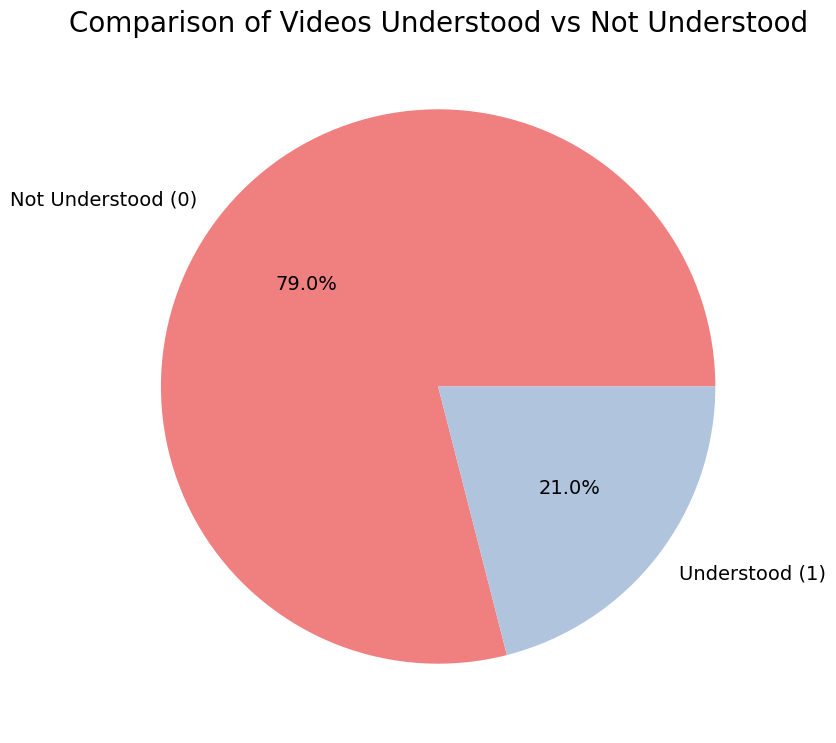

In [104]:
# Count the occurrences of 0s and 1s
value_counts = dataset["subject_understood"].value_counts()

# Prepare the data for the pie chart
percent_comparison = value_counts / value_counts.sum() * 100  # Convert to percentages

plt.figure(figsize=(9, 9))
plt.pie(
    percent_comparison,
    labels=["Not Understood (0)", "Understood (1)"],  # Custom labels
    autopct="%1.1f%%", 
    colors=["lightcoral", "lightsteelblue"],  # Custom colors
    textprops={'fontsize': 14}  # 👈 Increases both label and autopct font size
)
plt.title("Comparison of Videos Understood vs Not Understood", fontsize=20)
plt.show()


In [25]:
dataset.describe().T 

,count,mean,std,min,25%,50%,75%,max
video_id,68831.0,5.624297,2.215993,0.000000,5.000000,6.000000,6.000000,10.000000
subject_id,68831.0,3.710828,1.828410,0.000000,3.000000,4.000000,4.000000,7.000000
EEG.AF3,68831.0,4276.496212,115.584631,1030.769287,4258.461426,4287.307617,4311.153809,6238.077148
EEG.F7,68831.0,4257.994590,140.884855,805.384644,4236.410156,4266.538574,4296.153809,7599.615234
EEG.F3,68831.0,4302.803482,113.720961,1320.769287,4283.205078,4305.897461,4327.692383,6291.794922
...,...,...,...,...,...,...,...,...
POW.AF4.Alpha,68831.0,8.133554,51.722390,0.077566,0.997642,1.679386,3.035433,3092.790283
POW.AF4.BetaL,68831.0,3.861532,35.243356,0.041230,0.511406,0.833078,1.464920,3372.114746
POW.AF4.BetaH,68831.0,1.520038,13.153730,0.056951,0.284404,0.472978,0.837565,1347.074341
POW.AF4.Gamma,68831.0,0.697575,3.937423,0.035907,0.139540,0.262676,0.516598,331.578979


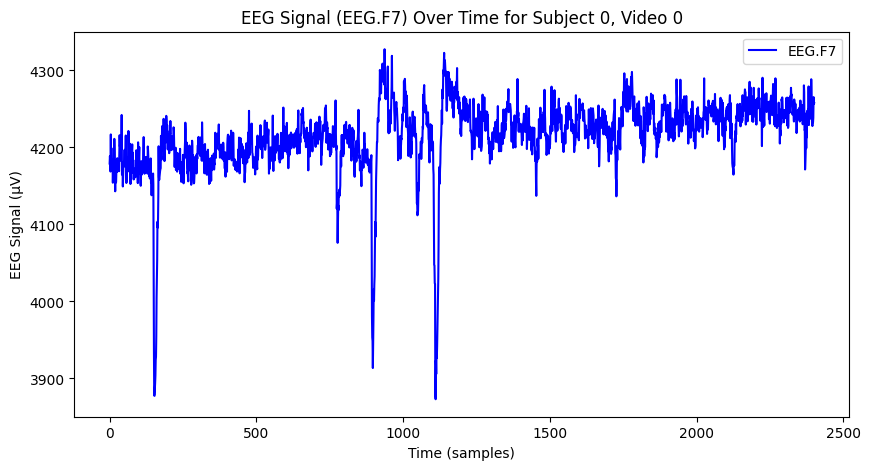

In [ ]:
subject_id = 0  # Choose a subject
video_id = 0  # Choose a video
eeg_sensor = "EEG.F7"  # Choose an EEG channel

subset = dataset[(dataset["subject_id"] == subject_id) & (dataset["video_id"] == video_id)]

plt.figure(figsize=(10, 5))
plt.plot(subset.index, subset[eeg_sensor], label=eeg_sensor, color='b')
plt.xlabel("Time (samples)")
plt.ylabel("EEG Signal (µV)")
plt.title(f"EEG Signal ({eeg_sensor}) Over Time for Subject {subject_id}, Video {video_id}")
plt.legend()
plt.show()


In [28]:
dataset = pd.read_csv(path)
display(dataset)

,video_id,subject_id,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,...,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma,subject_understood
0,0,0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,...,1.583895,0.504567,0.471979,0.138717,1.801014,1.504794,0.258570,0.435745,0.469483,0
1,0,0,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,...,1.709560,0.606587,0.527616,0.155580,1.859177,1.379617,0.317579,0.468416,0.642560,0
2,0,0,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,...,1.873591,0.795834,0.565414,0.170816,2.027946,1.283876,0.441925,0.494701,0.798197,0
3,0,0,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,...,2.110017,1.021118,0.579656,0.180056,2.265952,1.306188,0.616881,0.506062,0.886495,0
4,0,0,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,...,2.462552,1.230984,0.573620,0.181081,2.461205,1.522420,0.822598,0.498361,0.874455,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68826,10,7,4353.846191,4349.487305,4317.563965,4343.461426,4375.641113,4296.025879,4351.666504,4309.358887,...,2.088463,0.925704,0.825126,0.576437,2.009375,3.020382,2.115835,1.735570,1.125858,1
68827,10,7,4335.769043,4326.538574,4310.641113,4331.153809,4363.333496,4297.179688,4336.025879,4282.563965,...,1.899325,0.833753,0.786224,0.600227,2.505607,2.680849,1.971062,1.468342,1.250918,1
68828,10,7,4321.666504,4313.205078,4310.000000,4310.384766,4357.436035,4296.025879,4337.563965,4291.153809,...,1.743110,0.789346,0.777936,0.631701,3.082165,2.443027,1.868980,1.213362,1.373250,1
68829,10,7,4334.615234,4316.666504,4318.717773,4339.102539,4370.512695,4297.436035,4333.461426,4297.051270,...,1.603054,0.781398,0.792152,0.661582,3.607407,2.341642,1.780673,0.982586,1.449505,1


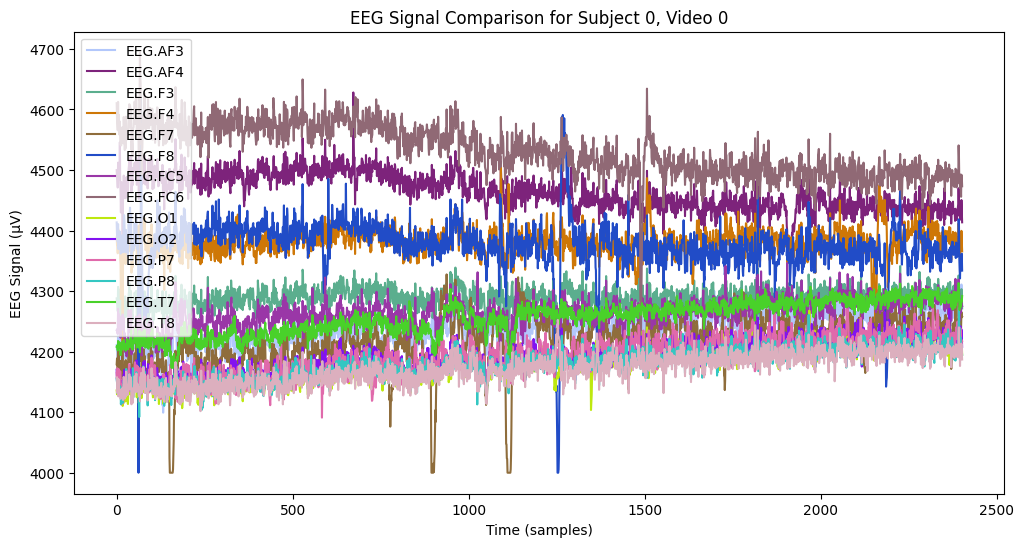

'sales_by_year = dataset.groupby("Year")["Global_Sales"].sum().reset_index()\nplt.figure(figsize=(10, 5))\nplt.plot(sales_by_year["Year"], sales_by_year["Global_Sales"], marker="o", linestyle="-", color="blue")\nplt.xlabel("Year")\nplt.ylabel("Total Global Sales (Millions)")\nplt.title("Video Game Sales Over Time")\nplt.grid(True)\nplt.show() '

In [22]:
# Line Graph Data 

import matplotlib.pyplot as plt
import random

# List of EEG sensors
eeg_sensors_alpha = [
    "POW.AF3.Alpha", "POW.AF4.Alpha", "POW.F3.Alpha", "POW.F4.Alpha", 
    "POW.F7.Alpha", "POW.F8.Alpha", "POW.FC5.Alpha", "POW.FC6.Alpha",
    "POW.O1.Alpha", "POW.O2.Alpha", "POW.P7.Alpha", "POW.P8.Alpha",
    "POW.T7.Alpha", "POW.T8.Alpha"
]

# Generate random colors for each EEG sensor
sensor_colors = {sensor: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for sensor in eeg_sensors}

# Define subject and video
subject_id = 0
video_id = 0

# Filter the dataset for the specific subject and video
subset = dataset[(dataset["subject_id"] == subject_id) & (dataset["video_id"] == video_id)].copy()  # Ensure a copy is made

# Define upper and lower threshold for EEG (adjust as needed)
lower_threshold = 4000  # µV (minimum reasonable EEG value)
upper_threshold = 4700  # µV (maximum reasonable EEG value)

# Apply clipping to remove extreme values
for sensor in eeg_sensors:
    subset[sensor] = subset[sensor].clip(lower_threshold, upper_threshold)  # Apply clipping correctly

# Create the figure
plt.figure(figsize=(12, 6))

# Plot each EEG signal with its assigned random color
for sensor in eeg_sensors:
    plt.plot(subset.index, subset[sensor], label=sensor, color=sensor_colors[sensor])

# Add labels and title
plt.xlabel("Time (samples)")
plt.ylabel("EEG Signal (µV)")
plt.title(f"EEG Signal Comparison for Subject {subject_id}, Video {video_id}")

# Add a legend to distinguish all EEG signals
plt.legend()

# Show the plot
plt.show()





"""sales_by_year = dataset.groupby("Year")["Global_Sales"].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(sales_by_year["Year"], sales_by_year["Global_Sales"], marker="o", linestyle="-", color="blue")
plt.xlabel("Year")
plt.ylabel("Total Global Sales (Millions)")
plt.title("Video Game Sales Over Time")
plt.grid(True)
plt.show() """

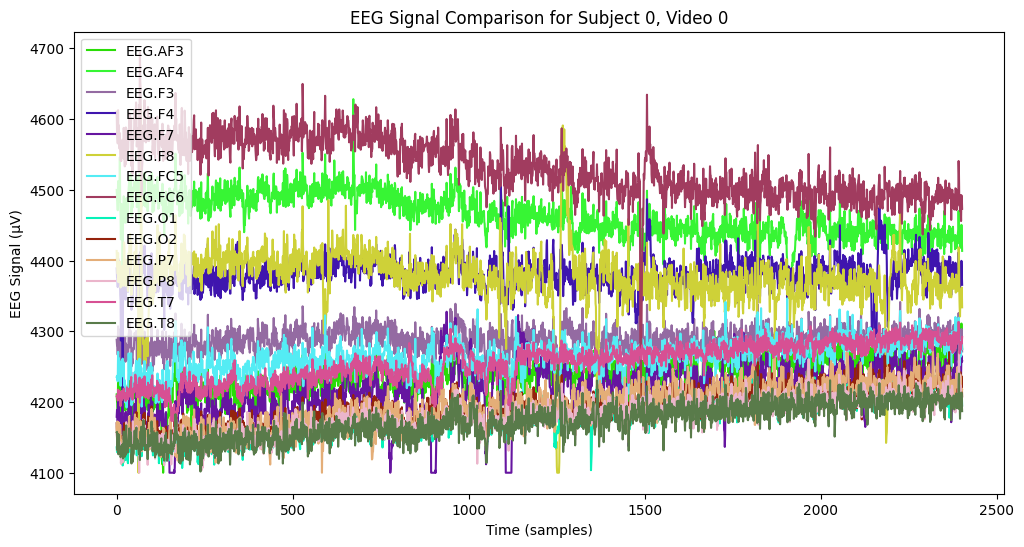

In [24]:
# Line Graph Data 

import matplotlib.pyplot as plt
import random

# List of EEG sensors
eeg_sensors_alpha = [
    "POW.AF3.Alpha", "POW.AF4.Alpha", "POW.F3.Alpha", "POW.F4.Alpha", 
    "POW.F7.Alpha", "POW.F8.Alpha", "POW.FC5.Alpha", "POW.FC6.Alpha",
    "POW.O1.Alpha", "POW.O2.Alpha", "POW.P7.Alpha", "POW.P8.Alpha",
    "POW.T7.Alpha", "POW.T8.Alpha"
]

# Generate random colors for each EEG sensor
sensor_colors = {sensor: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for sensor in eeg_sensors}

# Define subject and video
subject_id = 0
video_id = 0

# Filter the dataset for the specific subject and video
subset = dataset[(dataset["subject_id"] == subject_id) & (dataset["video_id"] == video_id)].copy()  # Ensure a copy is made

# Define upper and lower threshold for EEG (adjust as needed)
lower_threshold = 4100  # µV (minimum reasonable EEG value)
upper_threshold = 4700  # µV (maximum reasonable EEG value)

# Apply clipping to remove extreme values
for sensor in eeg_sensors:
    subset[sensor] = subset[sensor].clip(lower_threshold, upper_threshold)  # Apply clipping correctly

# Create the figure
plt.figure(figsize=(12, 6))

# Plot each EEG signal with its assigned random color
for sensor in eeg_sensors:
    plt.plot(subset.index, subset[sensor], label=sensor, color=sensor_colors[sensor])

# Add labels and title
plt.xlabel("Time (samples)")
plt.ylabel("EEG Signal (µV)")
plt.title(f"EEG Signal Comparison for Subject {subject_id}, Video {video_id}")

# Add a legend to distinguish all EEG signals
plt.legend()

# Show the plot
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("EEG_data.csv")

# Set specific subject and video ID
subject_id = 1
video_id = 1

# Filter the data
filtered = dataset[(dataset["subject_id"] == subject_id) & (dataset["video_id"] == video_id)]

# Check if data exists
if not filtered.empty:
    # Count 0s and 1s
    value_counts = filtered["subject_understood"].value_counts()

    # Convert to percentages
    percent_comparison = value_counts / value_counts.sum() * 100

    # Label and color mapping based on values present
    label_map = {0: "Not Understood (0)", 1: "Understood (1)"}
    color_map = {0: "lightcoral", 1: "lightsteelblue"}
    
    labels = [label_map[val] for val in value_counts.index]
    colors = [color_map[val] for val in value_counts.index]

    # Create the pie chart
    plt.figure(figsize=(9, 9))
    plt.pie(
        percent_comparison,
        labels=labels,
        autopct="%1.1f%%",
        colors=colors
    )
    plt.title(f"Understanding Breakdown for Subject {subject_id}, Video {video_id}")
    plt.show()
else:
    print(f"No data found for Subject {subject_id} and Video {video_id}.")


FileNotFoundError: [Errno 2] No such file or directory: 'EEG_data.csv'